# To do list
* Combine the data over the years 1981-2017
* Visualize mean heating degree days for months of January and December 
* Find the average for each month of the mean heating degree days 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import arviz as az
import calendar 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import pymc3 as pm
import seaborn as sns
from util import *

%matplotlib inline

In [3]:
# Let's look at the first year 
df = pd.read_csv("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/1981/Population.Heating.txt", delimiter="|", skiprows=[0,1,2])
# Below I am changing the region column as the index instead of the standard 0, 1, ... n
df = df.set_index('Region')

In [4]:
df.head()

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,19811222,19811223,19811224,19811225,19811226,19811227,19811228,19811229,19811230,19811231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,31,34,39,37,36,32,38,44
2,45,42,50,59,56,47,42,51,56,52,...,38,25,28,32,36,34,32,30,37,39
3,36,43,51,62,59,48,49,57,55,57,...,34,36,41,41,36,35,38,45,48,39
4,33,40,46,55,47,39,47,48,48,54,...,36,44,44,42,39,41,47,53,48,44
5,24,23,26,27,34,31,23,30,31,31,...,21,9,12,16,20,19,18,16,21,22


In [5]:
result, JanuaryData, DecemberData, avgMonth = comb_data(1981, 2017, df)

In [6]:
result

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,32,34,43,53,59,59,57,59
2,45,42,50,59,56,47,42,51,56,52,...,31,25,30,33,43,49,54,53,50,55
3,36,43,51,62,59,48,49,57,55,57,...,29,32,41,47,58,62,60,54,54,60
4,33,40,46,55,47,39,47,48,48,54,...,39,45,47,55,61,64,57,54,62,68
5,24,23,26,27,34,31,23,30,31,31,...,12,7,12,20,21,22,27,26,24,29
6,24,29,28,30,42,36,32,39,35,37,...,9,9,22,33,31,35,37,33,32,39
7,14,17,17,18,22,18,19,20,18,18,...,9,19,19,24,23,28,28,23,19,27
8,22,22,23,23,24,26,26,28,28,27,...,36,33,34,30,32,29,26,24,27,30
9,14,16,14,15,14,15,17,18,17,16,...,23,20,18,17,17,15,13,11,12,15


In [7]:
# let's make sure we have all the datapoints for the Janauary and December data--should have 37 years * 31 days = 1147 data points
print("January data: " + str(len(JanuaryData)))
print("December data: " + str(len(DecemberData)))

January data: 1147
December data: 1147


In [8]:
# Now let's look at the means for January and December
print("The mean heating days for January from 1981 to 2017 is {}".format(np.round(np.mean(JanuaryData), 2)))
print("The mean heating days for December from 1981 to 2017 is {}".format(np.round(np.mean(DecemberData), 2)))

The mean heating days for January from 1981 to 2017 is 28.31
The mean heating days for December from 1981 to 2017 is 25.67


In [9]:
print("The average mean heating days from 1981 to 2017 is {}".format(np.round(np.mean(avgMonth), 2)))

The average mean heating days from 1981 to 2017 is 11.77


In [10]:
sns.set(rc={'figure.figsize':(18,8)})

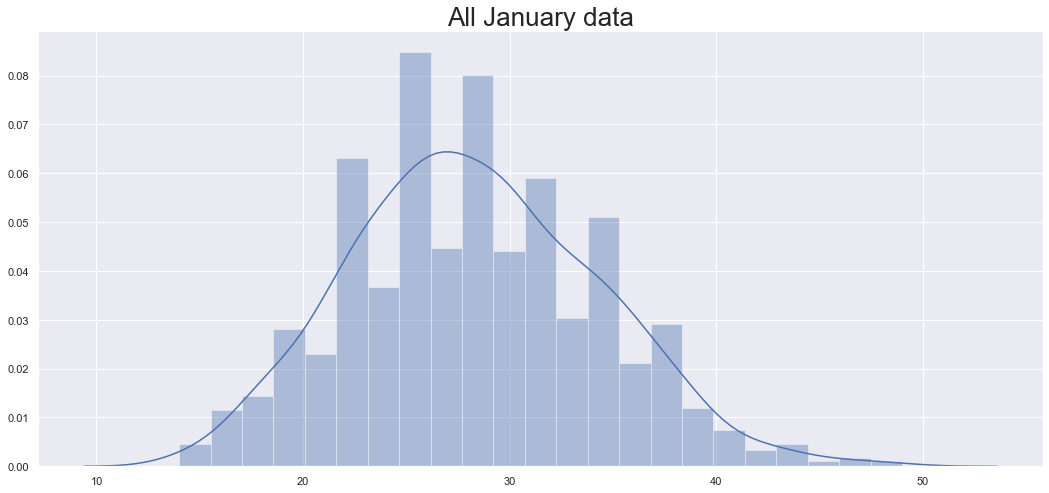

In [11]:
sns.distplot(JanuaryData).set_title('All January data', fontsize = 26);

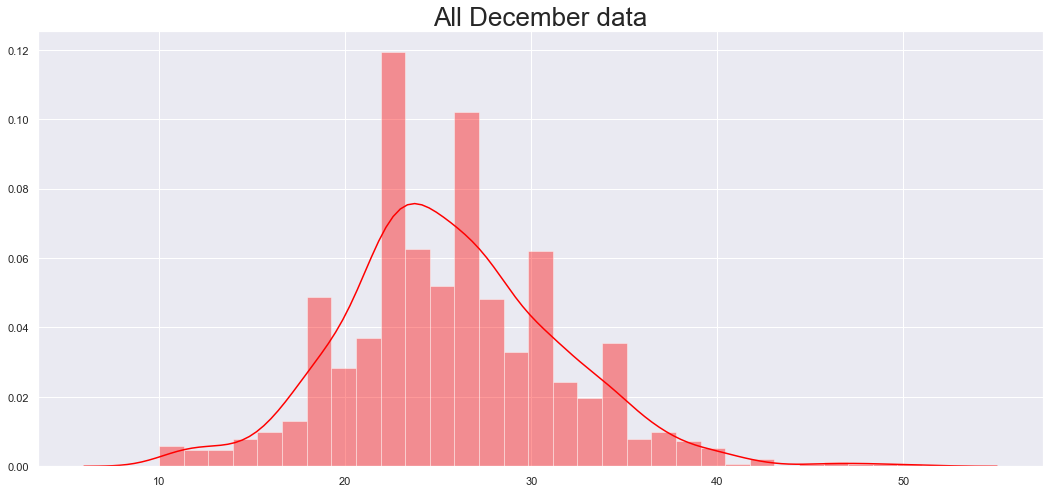

In [12]:
sns.distplot(DecemberData, color = 'red').set_title('All December data', fontsize = 26);

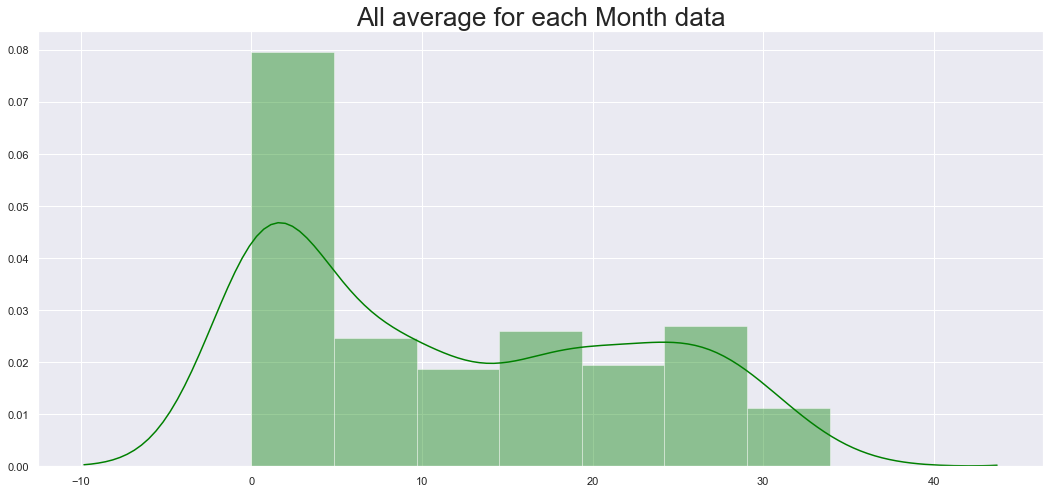

In [13]:
sns.distplot(avgMonth, color = 'green').set_title('All average for each Month data', fontsize = 26);

In [14]:
month_dates = pd.date_range('1/1/1981', periods=444, freq='M')

In [15]:
month_dates

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', length=444, freq='M')

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

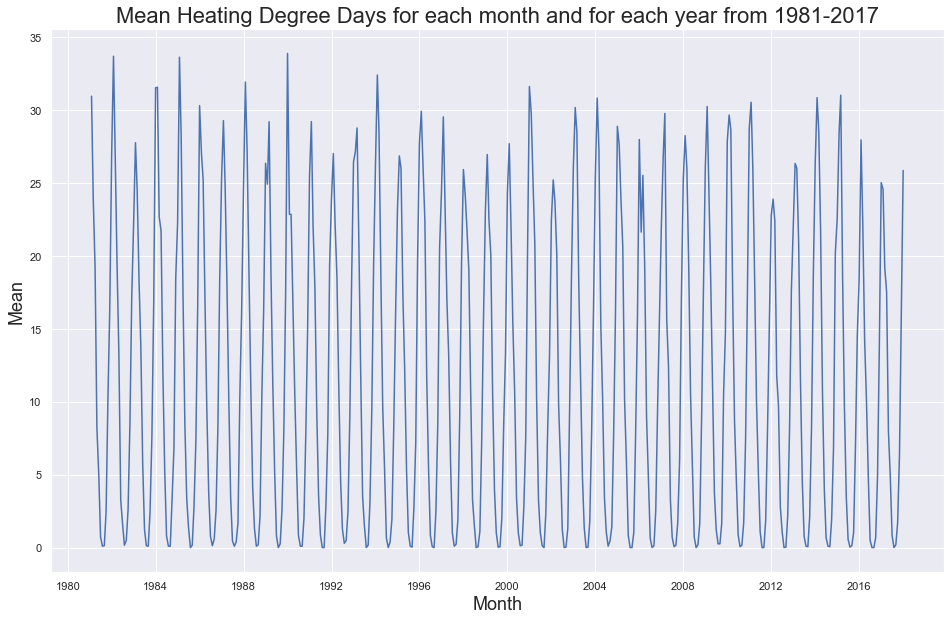

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(month_dates, avgMonth);
ax.set_xlabel("Month", fontsize=18);
ax.set_ylabel("Mean", fontsize=18);
ax.set_title("Mean Heating Degree Days for each month and for each year from 1981-2017", fontsize=22);

In [18]:
plt.style.use('seaborn-darkgrid')
print('Running with PyMC3 version v.{}'.format(pm.__version__))

Running with PyMC3 version v.3.7


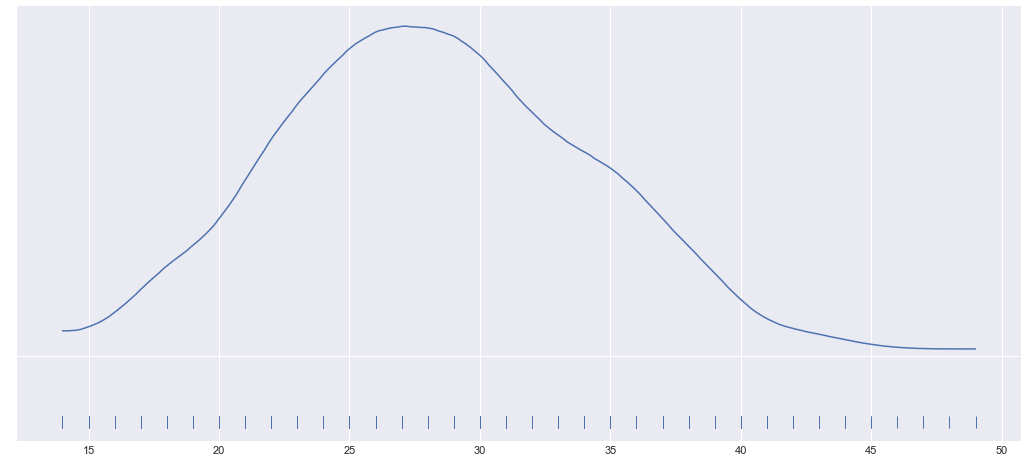

In [19]:
# let's again see a plot for the January data
az.plot_kde(JanuaryData, rug=True)
plt.yticks([0], alpha=0);

In [20]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=60)
    σ = pm.HalfNormal('σ', sd=5)
    y = pm.Normal('y', mu=μ, sd=σ, observed=JanuaryData)
    trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [σ, μ]
Sampling 2 chains: 100%|███████████████████████████████████████████████████████| 4000/4000 [00:05<00:00, 697.24draws/s]


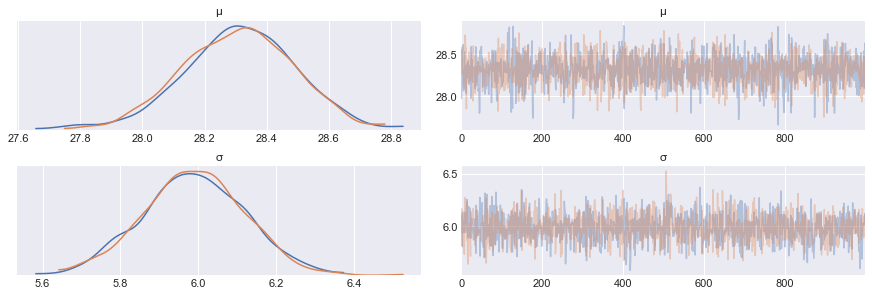

In [21]:
az.plot_trace(trace_g);

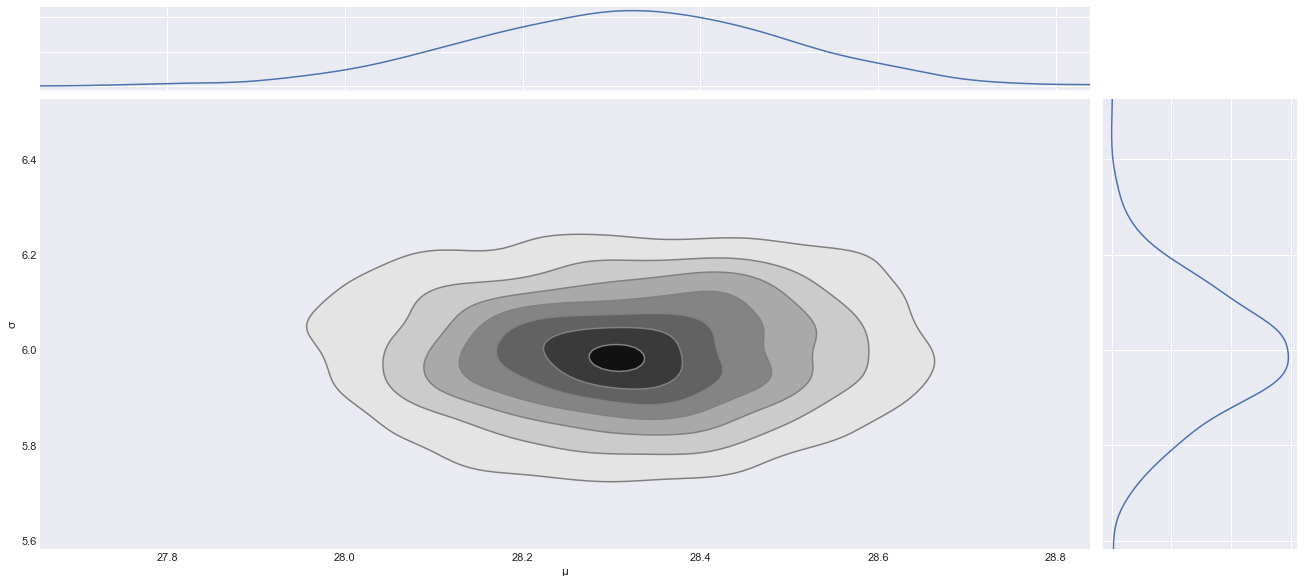

In [22]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

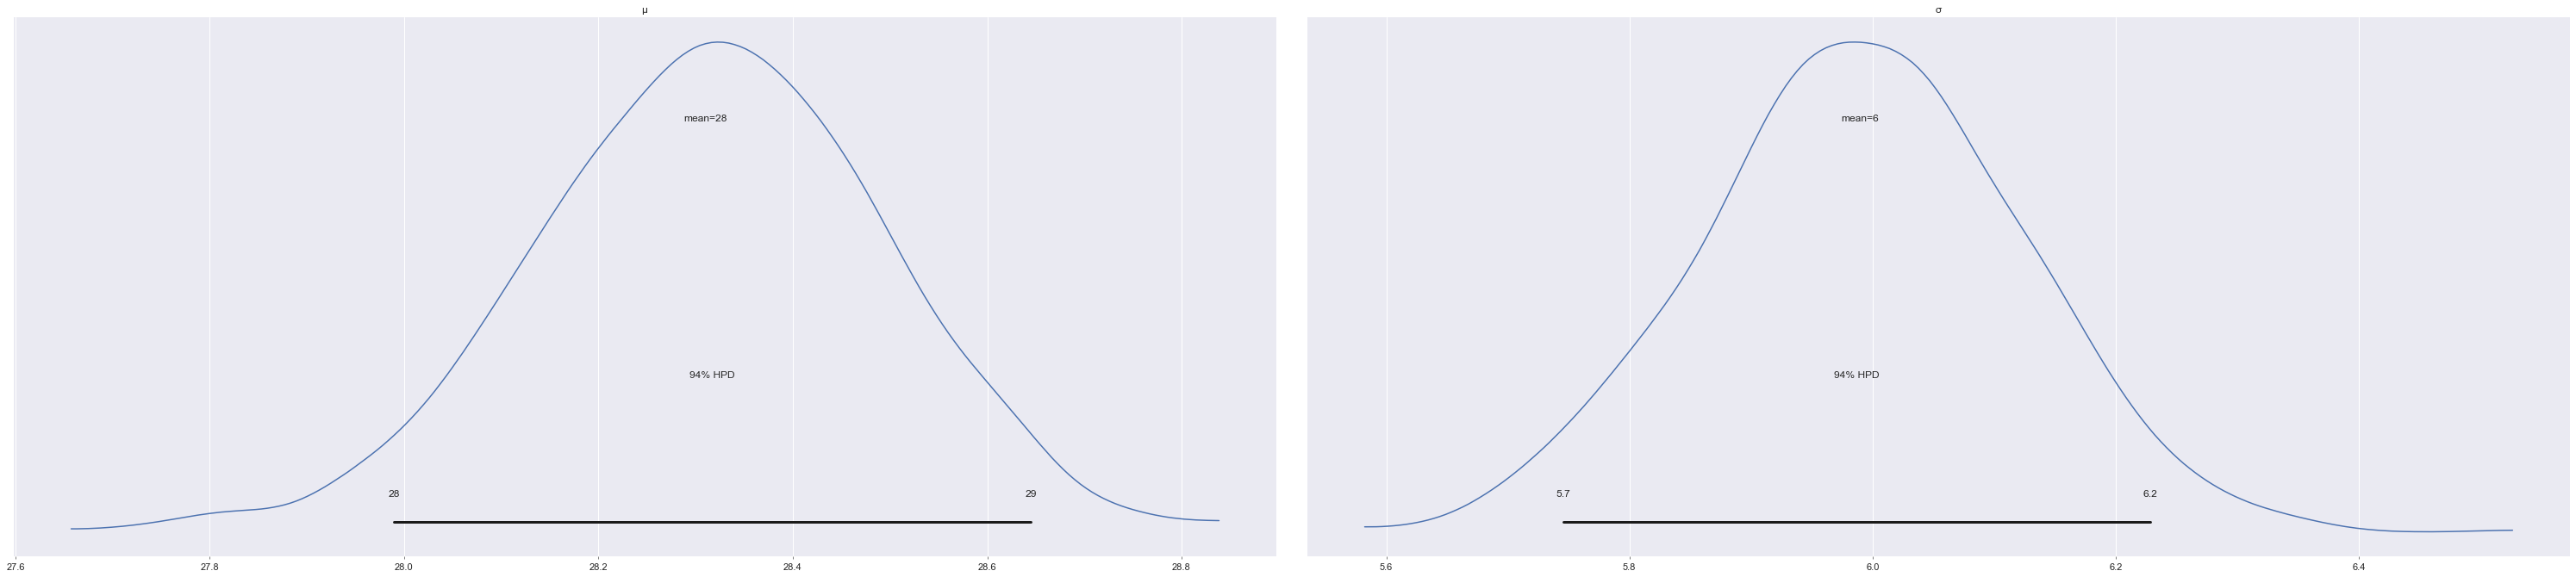

In [23]:
az.plot_posterior(trace_g);

In [24]:
pm.gelman_rubin(trace_g)

{'μ': 0.9998494829654413, 'σ': 0.9995524676342822}

In [25]:
ppc = pm.sample_posterior_predictive(trace_g, samples=1000, model=model_g)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 879.11it/s]


In [26]:
np.asarray(ppc['y']).shape

(1000, 1147)

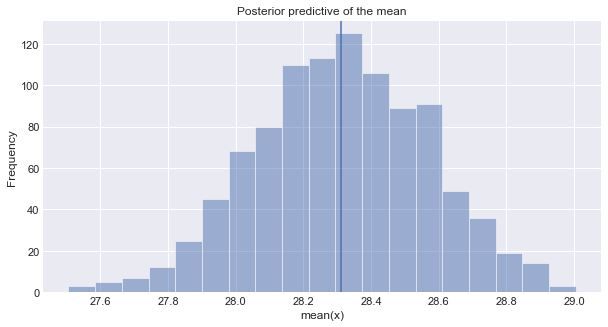

In [27]:
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc['y']], bins=19, alpha=0.5)
ax.axvline(np.mean(JanuaryData))
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');

In [28]:
y_true = np.mean(JanuaryData)
y_true

28.312118570183085

In [29]:
y_pred = ppc['y'].mean()
y_pred 

28.31411028959723

In [30]:
print((y_pred - y_true)/y_true*100)

0.00703486533234539
